# Problema 1 (tema 3)

Deducir la expresión de la fórmula compuesta de Simpson, así como la expresión del error. Utilizando esta fórmula:

1. Definir una función `quad_comp_simpson(f, a, b, N)` que aproxime la integral de $f$ en $[a,b]$ 
1. Calcular el número de subintervalos en los que hay que dividir el intervalo $[0,1]$ para que el error de cuadratura sea menor que $\varepsilon=10^{-5}$.
2. Calcular una aproximación de la integral
>$$
 \int_0^1 e^{1-x^2}\, dx
 $$
en la que podamos garantizar que el error de cuadratura es menor que $\varepsilon=0.001$.

In [3]:
from __future__ import division, print_function # Sólo para Python 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
f = lambda x: np.exp(1-x**2)
a, b = 0, 1
epsilon = 1.e-5

### Fórmula compuesta de Simpson

La fórmula de Simpson es una fórmula de cuadratura con tres puntos
$x_0,x_1,x_2$ ($n=2$) que, en un intervalo $[\alpha,\beta]$, se
escribe como

> \begin{equation} \int_{\alpha}^{\beta} f(x)\,dx =
\frac{h}{3}\Big(f(\alpha)+4f\big(\frac{\alpha + \beta}2\big)
+f(\beta)\Big) - \frac{h^5}{90} f^{4)}(\xi), \quad
\xi\in(\alpha,\beta),
\end{equation}

donde $h=(\beta-\alpha)/2$. En el caso de una fórmula **compuesta**,
dividimos el intervalo $[a,b]$ en $N$ subintervalos
$[\overline x_{i-1}, \overline x_{i}]$, $i=1,...,N$, y en cada uno
de ellos aplicamos la f.c anterior.

En el caso de la f.c. de los trapecios, los nodos de cuadratura
coinciden con los extremos de los subintervalos y cons sus puntos
medios. Los denotamos como $x_i$, con orden creciente, es decir:
> \begin{align*} x_{2i}&=\overline x_i, \quad i=0,...,N,
    \\
    x_{2i-1}&=(\overline x_{i-1}+\overline x_i)/2, \quad i=1,...,N.
  \end{align*}

Aplicando la fórmula de Simpson en cada intervalo $[x_i, x_{i+1}]$ (o sea, tomando con
$[\alpha,\beta]=[x_i, x_{i+1}]$ en expresión anterior de la fórmula de Simpson), obtenemos la siguiente expresión
de la fórmula compuesta de Simpson: 
> \begin{equation*}
\int_a^b f(x)\,dx
  = \frac{h}{3} \left[
    f_0
    + 2\sum_{i=1}^{N-1} f_{2i}
    + 4\sum_{i=1}^{N} f_{2i-1}
    + f_{2N} \right]
  - \sum_{i=1}^N  \frac{h^5}{90} f^{4)}(\xi_i),
\end{equation*}

donde $\xi_i\in (x_i,x_{i+1})$ y $h=(x_{i+1}-x_i)/2 = (b-a)/{2N}$.

Podemos eliminar el sumatorio que aparece en el último término
(término de error) en la expresión anterior. Para ello, tenemos en
cuenta que 
> $$ m_4 \le \frac 1 N \sum_{i=0}^{N-1} f^{4)}(\xi_i) \le M_4,
$$

donde $m_4=\min_{x\in[a,b]} |f''(x)|$ y
$M_4=\max_{x\in [a,b]} |f^{4)}(x)|$. Como $f^{4)}$ es continua, alcanza
todos los valores entre $m_4$ y $M_4$, en particular existe
$\xi\in[a,b]$ tal que 
> $$
f^{4)}(\xi) = \frac 1 N \sum_{i=0}^{N-1} f^{4)}(\xi_i).
$$

Luego (usando que $h=(b-a)/2N$): 
> $$
\sum_{i=0}^{N-1} f^{4)}(\xi_i) = N f^{4)}(\xi) = \frac{b-a} {2h} f^{4)}(\xi).
$$

Sustituyendo en la expresión anterior de la fórmula compuesta,
tenemos la expresión definitiva de la fórmula compuesta de Simpson: 
> $$
    \int_a^b f(x)\,dx
    = \frac{h}{3} \left[
      f_0
      + 2\sum_{i=1}^{N-1} f_{2i}
      + 4\sum_{i=1}^{N} f_{2i-1}
      + f_{2N} \right]
    - \frac{(b-a)h^4}{180} f^{4)}(\xi).
$$

donde $\xi\in [a,b]$.


### 1. Función de cuadratura

Para definir esta función, tenemos que distinguir entre nodos los con índice par, $x_{2i}$ y los nodos con índice impar, $x_{2i+1}$. Para ello, estudiaremos con más detalle el acceso a listas en python:

#### a) Repaso de listas en Python

- Si $N\in\mathbb{N}$, la función `range(N)` devuelve un iterador que devuelve los $N$ valores 0,1,...,N-1 (Intervalo $[0,N-1)\cap \mathbb{Z}$).
- La variante `range(M,N)` devuelve un iterador para los valores M, M+1,M+2,..., N-1 (Intervalo $[M,N)\cap \mathbb{Z}$)
- Por último, `range(M,N,k)` devuelve un iterador para los valores M, M+k, M+2k,..., N-1

In [5]:
x = range(11) # 0,1,...,10
print("x = range(11) :", list(x))

x= range(5,11) # 5,6,...,10
print("x = range(5,11) :", list(x))

x= range(5,11,2) # 5, 6, 9
print("x = range(5,11,2) :", list(x))

x = range(11) : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = range(5,11) : [5, 6, 7, 8, 9, 10]
x = range(5,11,2) : [5, 7, 9]


Podemos acceder a los elementos de una lista (o de un *array*) usando una sintaxis similar a la anterior. Si x es una lista:
- La expresión `x`, o `x[:]`, representa todos los elementos de la lista x
- La expresión `x[M:N]`, o `x[M:]`, representa los elementos `x[M]`, `x[M+1]`,..., `x[N-1]`
- La expresión `x[M:N:k]`, o `x[M::k]`, representa los elementos `x[M]`, `x[M+k]`,..., `x[N-1]`

In [6]:
x = np.linspace(0,10,11) # Array [0, 0.1, 0.2, ...,1]
print("x = x[:]            =", x)
print("x[5:11] = x[5:]     =", x[5:])
print("x[5:11:2] = x[5::2] =", x[5::2])

x = x[:]            = [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
x[5:11] = x[5:]     = [  5.   6.   7.   8.   9.  10.]
x[5:11:2] = x[5::2] = [ 5.  7.  9.]


#### b) Programación de la fórmula compuesta de Simpson

Usando lo anterior, será muy fácil programar la fórmula compuesta de Simpson:

In [7]:
def cuad_comp_Simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1::2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad

# Es bueno hacer algunos tests...
x = cuad_comp_Simpson(lambda x: x**1, 0, 1, 3)
assert( abs(x-1./2) < 1.e-15)

x = cuad_comp_Simpson(lambda x: x**2, 0, 1, 3)
assert( abs(x-1./3) < 1.e-15)

x = cuad_comp_Simpson(lambda x: x**3, 0, 1, 3)
assert( abs(x-1./4) < 1.e-15  )


### 2. Cálculo del número de intervalos necesarios para que el error sea menor que $\varepsilon$

Según vimos anteriormente, el error de la fórmula compuesta tiene la siguiente expresión:
$$ 
- \frac{(b-a)h^4}{180} f^{4)}(\xi),
$$
donde $\xi\in(a,b)$ es desconocido. Para que el error, en valor absoluto, sea menor que $\varepsilon$ deberemos imponer
$$ 
 \frac{(b-a)h^4}{180} \|f^{4)}\|_{\infty} < \varepsilon,
$$
Suponiendo que hemos calculado $\|f^{4)}\|_{\infty}$, basta usar $h=(b-a)/(2N)$ e igualar a $\varepsilon$:
$$ 
 \frac{(b-a)^5}{180(2N)^4} \|f^{4)}\|_{\infty} = \varepsilon,
$$
para deducir que el número de intervalos que tomemos debe ser, al menos, igual al primer entero mayor que
$$ 
 N = \left(\frac{(b-a)^5}{2880 \varepsilon} \|f^{4)}\|_{\infty} \right)^{1/4}.
$$

En nuestro caso:
- $b-a = 1-0 = 1$
- $\varepsilon = 0.001 = 10^{-3}$

Sólo falta calcular $\|f^{4)}\|_{\infty}$, lo que haremos (sin ser rigurosos) representando la gráfica de esta función. Usaremos, por ejemplo, el paquete simbólico `sympy`:

In [8]:
import sympy as sp  
sp.init_printing() # Usar LaTeX
x = sp.symbols('x') # Definir x como variable simbólica
f_s = lambda x: sp.exp(1-x*x) # Definir f_s como función simbólica
sp.diff(f_s(x), x, 4) # Hallar la cuarta derivada de la función

A la vista de la gráfica, el máximo de $|f^{4)}|$ se alcanza en a=0 y su valor es:
M4 = 32.6193819415


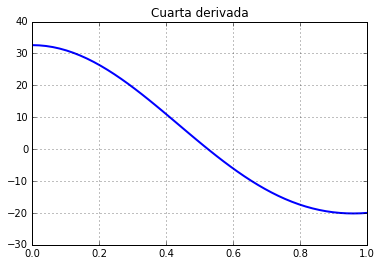

In [9]:
f4 = lambda x: 4*(4*x**4 - 12*x**2 + 3)*np.exp(-x**2+1) # Definimos f4 como función numérica
xx = np.linspace(a, b)
plt.plot(xx, f4(xx), lw=2) # Representamos la gráfica
plt.grid()
plt.title("Cuarta derivada")
M4 = abs(f4(a))
print("A la vista de la gráfica, el máximo de $|f^{4)}|$ se alcanza en a=0 y su valor es:")
print("M4 =", M4)

Así podemos calcular $$\frac{(b-a)^5}{2880 \varepsilon} \|f^{4)}\|_{\infty}:$$

In [10]:
N=((b-a)**5/(2880*epsilon)*M4)**(1/4)
N = np.ceil(N) # La función ceil(x) devuelve el primer entero mayor que x
print("N =",N)

N = 6.0


### Aproximamos la integral

In [12]:
N = 6
int_simpson = cuad_comp_Simpson(f, a, b, N)
print("Integral aproximada:", int_simpson)

# Comparamos con la función predefinida en Python
from scipy.integrate import quad
quad_python = quad(f, a, b)
print("Cuadratura de python:", quad_python)

print("Diferencia:", int_simpson - quad_python[0])

Integral aproximada: 2.0300795391
Cuadratura de python: (2.030078469278705, 2.2538398583890115e-14)
Diferencia: 1.06982539227e-06
